In [3]:
#En se basant sur les résultats obtenus lors de la première phase de notre  projet : Classification binaire du trafic  
# nous allons travailler par la suite par : 
# ****StaderScaler pour la normalisation 
#****Sélection de Variable 
#****RandomForestClassifier 
 

In [31]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import numpy as np  
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter  
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_validate 

# Understanding the data set 

In [12]:
df = pd.read_csv('Base.csv')
df  

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulies
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [13]:
df.columns  

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulies'],
      dtype='object')

In [14]:
df.isnull().sum().max()  

0

In [15]:
df.describe()  

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulies
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [16]:
df["class"].unique()   

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [17]:
df["class"].unique().shape[0]  

40

In [18]:
df.shape[0] 

148517

In [19]:
#Replacing the value of the class : 
l1=["back", "land", "neptune", "pod","smurf","teardrop","apache2", "udpstorm","processtable", "worm"] 
l2=["satan", "ipsweep", "nmap", "portsweep","mscan","saint"]
l3=["guess_passwd","ftp_write", "imap", "phf","multihop", "warezmaster", "warezclient","spy","xlock", "xsnoop", "snmpguess", "snmpgetattack",
"httptunnel", "sendmail", "named"]
l4=["buffer_overflow", "loadmodule", "rootkit", "perl",
"sqlattack", "xterm", "ps"]

for i in range (df.shape[0]) : 
    
  if df["class"][i] in l1 : 
    df.replace(to_replace=df["class"][i],value="Dos",inplace=True )
  elif  df["class"][i] in l2 :
     df.replace(to_replace=df["class"][i],value="Probe",inplace=True ) 
  elif df["class"][i] in l3 :
     df.replace(to_replace=df["class"][i],value="R2L",inplace=True )
  elif df["class"][i] in l4 :
     df.replace(to_replace=df["class"][i],value="U2R",inplace=True )
      
    
   

In [20]:
df.head()   

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulies
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [21]:
df["class"].unique() 

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R', 'mailbomb'], dtype=object)

In [22]:
df["class"].value_counts()['mailbomb'] 

293

In [23]:
# mailbomb is also a Dos attack  
for i in range (df.shape[0]) : 
    
  if df["class"][i]=="mailbomb" : 
    df.replace(to_replace=df["class"][i],value="Dos",inplace=True )
 

In [24]:
df["class"].unique() 

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [25]:
df["class"].unique() 
df["class"].value_counts()
#Le data set est équilibré  

normal    77054
Dos       53387
Probe     14077
R2L        3880
U2R         119
Name: class, dtype: int64

Dos 35.95 % of the dataset
normal 51.88 % of the dataset
R2L 9.48 % of the dataset
R2L 0.08 % of the dataset


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n )')

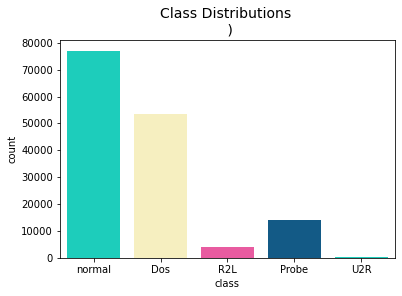

In [26]:
print('Dos', round(df['class'].value_counts()["Dos"]/len(df) * 100,2), '% of the dataset')
print('normal', round(df['class'].value_counts()["normal"]/len(df) * 100,2), '% of the dataset')
print('R2L', round(df['class'].value_counts()["Probe"]/len(df) * 100,2), '% of the dataset')
print('R2L', round(df['class'].value_counts()["U2R"]/len(df) * 100,2), '% of the dataset')
#the dataset  est plus au moins equilibré 
colors = ["#00EAD3", "#FFF5B7","#FF449F","#005F99"]

sns.countplot('class', data=df, palette=colors)
plt.title('Class Distributions \n )', fontsize=14) 

In [27]:
# The dataset is imbalanced 
# To solve this problem we need to balance the dataset before training the model 
# La classe majoritaire est celle du trafic normal 
# La classe minoritaire est celle du U2R 
 

# Encoding 

In [28]:
#Encodage
le = preprocessing.LabelEncoder()
df['class']=le.fit_transform(df['class']) 
df.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulies
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,21


In [29]:
# OneHotEncoding encoding of protocol_type , service and flag columns 
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder() 
#ohe.fit_transform(df[['protocol_type','service','flag']]).toarray() 
feature_arr=ohe.fit_transform(df[['protocol_type','service','flag']]).toarray() 
#ohe.categories_
feature_labels= ohe.categories_ 
feature_labels=['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier',
        'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
        'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp',
        'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784',
        'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell',
        'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
        'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois','OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH']
features=pd.DataFrame(feature_arr,columns=feature_labels)
df=pd.concat([df,features],axis=1)
df

pd.DataFrame(feature_arr,columns=feature_labels) 
df.drop(['protocol_type','service','flag'], axis=1, inplace=True) 

In [30]:
df.describe() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,0.101557,0.015722,0.000707,0.020806,0.248214,0.002599,0.000956,0.002007,0.604779,0.002316
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,0.302066,0.124399,0.026580,0.142734,0.431978,0.050915,0.030907,0.044749,0.488900,0.048072
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Balancing the Dataset 

In [33]:
pipe_rf_m= make_pipeline(StandardScaler(), RandomForestClassifier())
scores = cross_validate(pipe_rf_m,X,y,cv=6,n_jobs=-1,scoring="f1_macro") 
scores['test_score'].mean() 

0.9344210637106594

# smote 

In [34]:
oversample=SMOTE()
X,y= oversample.fit_resample(X,y) 

In [35]:
y.to_frame() 

,class
0,4
1,4
2,0
3,4
4,4
...,...
385265,3
385266,3
385267,3
385268,3


In [36]:
df=pd.concat([X,y], axis=1)
df 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,class
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385265,223,1682,3164,0,0,0,3,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
385266,60,2331,4375,0,0,0,3,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
385267,0,0,5694,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
385268,183,1575,3303,0,0,0,3,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [37]:
counter= Counter(y)
for k, v in counter.items(): 
    dist=v/ len(y)*100 
    print(f"Class={k},n={v} ({dist}%)") 

Class=4,n=77054 (20.0%)
Class=0,n=77054 (20.0%)
Class=2,n=77054 (20.0%)
Class=1,n=77054 (20.0%)
Class=3,n=77054 (20.0%)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n )')

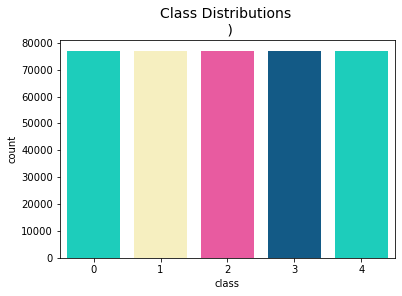

In [40]:

colors = ["#00EAD3", "#FFF5B7","#FF449F","#005F99"]

sns.countplot('class', data=df, palette=colors)
plt.title('Class Distributions \n )', fontsize=14) 

In [39]:
scores = cross_validate(pipe_rf_m,X,y,cv=6,n_jobs=-1,scoring="f1_macro") 


In [43]:
scores

{'fit_time': array([148.61613536, 153.74095297, 153.73297167, 154.1259234 ,
        155.71821928, 154.76026726]),
 'score_time': array([2.8149817 , 2.70432854, 2.62354517, 2.55273414, 1.63366055,
        2.21964931]),
 'test_score': array([0.99953277, 0.99978196, 0.99973522, 0.99968852, 0.9995795 ,
        0.98836891])}

In [44]:
scores['test_score'].mean()

0.9977811455610041

CeCi met en evidence  l importance de l équilibrage sur la perfermance des algorithmes . 

without scaling the dataset 0.892967999088886 after scaling 0.9350605341759471 after only balancing the data set 0.9977577578553071 